In [26]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [18]:
# Construimos la matriz de transformacion desde Base b hasta J1

q = (30*np.pi) / 180 # El angulo es 30 grados pero se pasa a radianes
R = np.array([[np.cos(q), -np.sin(q), 0],
            [np.sin(q), np.cos(q), 0],
            [0        , 0        , 1]])

t = np.array([[100*np.cos((120* np.pi) / 180)], 
             [100*np.sin((120* np.pi) / 180)],
             [0]]) 
#Construimos la matriz homogenea        
Rt = np.concatenate((R, t), axis=1)
Tb1 = np.concatenate((Rt, [[0,0,0,1]]), axis=0)
print(Tb1)

[[  0.8660254   -0.5          0.         -50.        ]
 [  0.5          0.8660254    0.          86.60254038]
 [  0.           0.           1.           0.        ]
 [  0.           0.           0.           1.        ]]


In [22]:
# Construimos la matriz de transformacion desde J1 hasta 21

q = (0*np.pi) / 180 # El angulo es 30 grados pero se pasa a radianes
R = np.array([[np.cos(q), -np.sin(q), 0],
            [np.sin(q), np.cos(q), 0],
            [0        , 0        , 1]])

t = np.array([[100], 
             [0],
             [0]]) 
#Construimos la matriz homogenea        
Rt = np.concatenate((R, t), axis=1)
T12 = np.concatenate((Rt, [[0,0,0,1]]), axis=0)
print(T12)

[[  1.  -0.   0. 100.]
 [  0.   1.   0.   0.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]


In [20]:
# Construimos la matriz de transformacion desde J2 hasta ee

q = (-45*np.pi) / 180 # El angulo es 30 grados pero se pasa a radianes
R = np.array([[np.cos(q), -np.sin(q), 0],
            [np.sin(q), np.cos(q), 0],
            [0        , 0        , 1]])

t = np.array([[50*np.cos(q)], 
             [50*np.sin(q)],
             [0]]) 
#Construimos la matriz homogenea        
Rt = np.concatenate((R, t), axis=1)
T2ee = np.concatenate((Rt, [[0,0,0,1]]), axis=0)
print(T2ee)


[[  0.70710678   0.70710678   0.          35.35533906]
 [ -0.70710678   0.70710678   0.         -35.35533906]
 [  0.           0.           1.           0.        ]
 [  0.           0.           0.           1.        ]]


In [35]:
# Con los valores obtenido calculamos Tbee = Tb1* T12 * T2ee

Tb2 = Tb1.dot(T12) # El producto matricial de Tb1 y Tb2
print(Tb2)
Tbee = Tb2.dot(T2ee) # El producto matricial de Tb2 y T2ee
print(Tbee)

[[  0.8660254   -0.5          0.          36.60254038]
 [  0.5          0.8660254    0.         136.60254038]
 [  0.           0.           1.           0.        ]
 [  0.           0.           0.           1.        ]]
[[  0.96592583   0.25881905   0.          84.89883169]
 [ -0.25881905   0.96592583   0.         123.66158812]
 [  0.           0.           1.           0.        ]
 [  0.           0.           0.           1.        ]]


(0.0, 140.0)

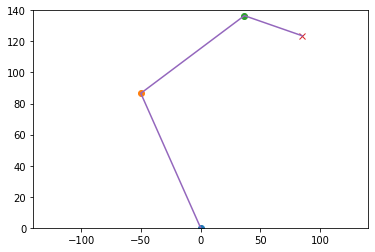

In [42]:
# Para graficar tomamos las coordenadas de los puntos de interes
x_J1 = Tb1[0,3]
y_J1 = Tb1[1, 3]
x_J2 = Tb2[0,3]
y_J2 = Tb2[1,3]
x_ee = Tbee[0,3]
y_ee = Tbee[1,3]

fig, axes = plt.subplots()
# Primero los puntos
plt.plot(0,0, "o")
plt.plot(x_J1, y_J1, "o")
plt.plot(x_J2, y_J2, "o")
plt.plot(x_ee, y_ee, "x")
# Las lineas
plt.plot([0, x_J1, x_J2, x_ee], [0, y_J1, y_J2, y_ee])
# Ajustamos los ejes
axes.set_xlim(-140, 140)
axes.set_ylim(0, 140)